<a href="https://colab.research.google.com/github/cosmin004/ML-Courses/blob/main/Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks
Probably the hotest topic in machine learning, neural networks have brought a massive contribution to the research area and have attained incredible results in many applications. In this course we will get the MNIST dataset, build an ANN, train it, test it and tune it to some extent.

## Importing the needed packages

In [ ]:
import pandas as pd
import tensorflow as tf
from PIL import Image
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

## Getting the dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = k.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

5


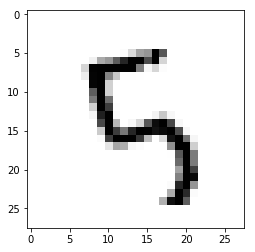

In [ ]:
index = 1024
print(y_train[index])
plt.imshow(X_train[index], cmap='Greys')

## Normalizing images
In order for the neural network to work well we need to normalize our input data. For images we can do that by dividing the input data by 255. Normally we would do that with some sort of scaler, but in this case, the maximum value for a pixel is 255 and the minimum value is 0(so we can normalize by dividing the input with value = max-min). 

In [ ]:
X_train_scaled = X_train.astype('float32')
X_test_scaled = X_test.astype('float32')

X_train_scaled /= 255
X_test_scaled /= 255

In [ ]:
X_test_scaled.shape[1:]

(28, 28)

## Building the ANN
Now we will use tensorflow and keras in order to build, train and test a fully connected neural network. We will build this NN with the sequential API for simplicity. 

In [ ]:
model = k.models.Sequential()
# First we need to flatten the input image. We can do that with a Flattening layer from keras
model.add(k.layers.Flatten(input_shape=X_train_scaled.shape[1:]))
# Let's add 3 dense, fully connected layers for the start
model.add(k.layers.Dense(288, activation='relu'))
model.add(k.layers.Dense(144, activation='relu'))
model.add(k.layers.Dense(72, activation='relu'))
# Last layer has 10 neurons with softmax activation (for the 10 classes that we have)
model.add(k.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 288)               226080    
_________________________________________________________________
dense_1 (Dense)              (None, 144)               41616     
_________________________________________________________________
dense_2 (Dense)              (None, 72)                10440     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                730       
Total params: 278,866
Trainable params: 278,866
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Start fitting the model with 10 epochs, while saving the history, with a batch size of 512 and a CV split of 0.2
history = model.fit(x=X_train_scaled,y=y_train, batch_size=512, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 91us/sample - loss: 0.5153 - accuracy: 0.8579 - val_loss: 0.1988 - val_accuracy: 0.9424
Epoch 2/10
48000/48000 [==============================] - 3s 57us/sample - loss: 0.1702 - accuracy: 0.9498 - val_loss: 0.1442 - val_accuracy: 0.9590
Epoch 3/10
48000/48000 [==============================] - 3s 58us/sample - loss: 0.1145 - accuracy: 0.9659 - val_loss: 0.1168 - val_accuracy: 0.9664
Epoch 4/10
48000/48000 [==============================] - 2s 48us/sample - loss: 0.0844 - accuracy: 0.9753 - val_loss: 0.1051 - val_accuracy: 0.9692
Epoch 5/10
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0644 - accuracy: 0.9812 - val_loss: 0.1049 - val_accuracy: 0.9697
Epoch 6/10
48000/48000 [==============================] - 3s 62us/sample - loss: 0.0490 - accuracy: 0.9853 - val_loss: 0.0859 - val_accuracy: 0.9747
Epoch 7/10
48000/48000 [==============================] 

Let's check how the training went by visualizing the loss for training and validation.

In [ ]:
test_scores = model.evaluate(X_test_scaled, y_test, verbose=2)

10000/10000 - 1s - loss: 0.0757 - accuracy: 0.9783


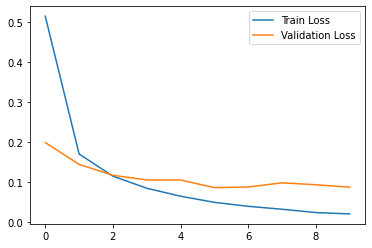

In [ ]:
plt.plot(np.arange(0, 10, 1), history.history['loss'], label='Train Loss')
plt.plot(np.arange(0, 10, 1), history.history['val_loss'], label='Validation Loss')
plt.legend()

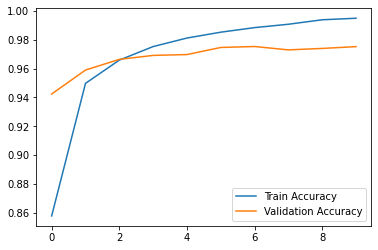

In [ ]:
plt.plot(np.arange(0, 10, 1), history.history['accuracy'], label='Train Accuracy')
plt.plot(np.arange(0, 10, 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Looks like the model has overfitted. We can see that because the accuracy on the train(99.56%) is noticeably higher than the test accuracy(97.7%). Let's rebuild the model and add some dropout regularisation now. We can do that in keras by adding to the model a dropout layer after the dense layers.

In [ ]:
model = k.models.Sequential()
# First we need to flatten the input image. We can do that with a Flattening layer from keras
model.add(k.layers.Flatten(input_shape=X_train_scaled.shape[1:]))
# Let's add 3 dense, fully connected layers for the start
model.add(k.layers.Dense(288, activation='relu'))
model.add(k.layers.Dropout(0.2))
model.add(k.layers.Dense(144, activation='relu'))
model.add(k.layers.Dropout(0.2))
model.add(k.layers.Dense(72, activation='relu'))
model.add(k.layers.Dropout(0.2))
# Last layer has 10 neurons with softmax activation (for the 10 classes that we have)
model.add(k.layers.Dense(10, activation='softmax'))

Let's see the performances now.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Start fitting the model with 10 epochs, while saving the history, with a batch size of 512 and a CV split of 0.2
history = model.fit(x=X_train_scaled,y=y_train, batch_size=512, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 96us/sample - loss: 0.7014 - accuracy: 0.7841 - val_loss: 0.2181 - val_accuracy: 0.9358
Epoch 2/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.2542 - accuracy: 0.9256 - val_loss: 0.1434 - val_accuracy: 0.9590
Epoch 3/10
48000/48000 [==============================] - 3s 67us/sample - loss: 0.1751 - accuracy: 0.9484 - val_loss: 0.1182 - val_accuracy: 0.9651
Epoch 4/10
48000/48000 [==============================] - 3s 71us/sample - loss: 0.1353 - accuracy: 0.9592 - val_loss: 0.0992 - val_accuracy: 0.9707
Epoch 5/10
48000/48000 [==============================] - 3s 66us/sample - loss: 0.1122 - accuracy: 0.9665 - val_loss: 0.0925 - val_accuracy: 0.9732
Epoch 6/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.0930 - accuracy: 0.9717 - val_loss: 0.0865 - val_accuracy: 0.9742
Epoch 7/10
48000/48000 [==============================] 

In [ ]:
test_scores = model.evaluate(X_test_scaled, y_test, verbose=2)

10000/10000 - 1s - loss: 0.0714 - accuracy: 0.9796


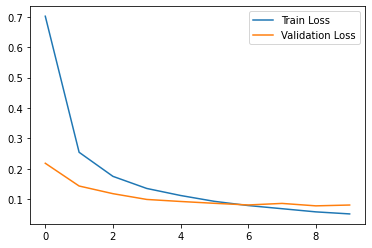

In [ ]:
plt.plot(np.arange(0, 10, 1), history.history['loss'], label='Train Loss')
plt.plot(np.arange(0, 10, 1), history.history['val_loss'], label='Validation Loss')
plt.legend()

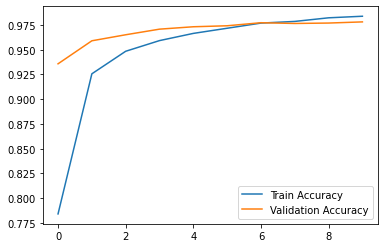

In [ ]:
plt.plot(np.arange(0, 10, 1), history.history['accuracy'], label='Train Accuracy')
plt.plot(np.arange(0, 10, 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

Now that looks a lot better. We can try improving our model now by trying to tune the following hyperparameters:

# Contest
Try improving the model in 5-10 minutes. Try and get as high accuracy as possible.
You can start changin the model on the following baseline model:

In [ ]:
model = k.models.Sequential()

model.add(k.layers.Flatten(input_shape=X_train_scaled.shape[1:])) # This layer shall not be changed
model.add(k.layers.Dense(288, activation='relu'))
model.add(k.layers.Dropout(0.2))
model.add(k.layers.Dense(144, activation='relu'))
model.add(k.layers.Dropout(0.2))
model.add(k.layers.Dense(72, activation='relu'))
model.add(k.layers.Dropout(0.2))
model.add(k.layers.Dense(10, activation='softmax')) # This layer shall not be changed

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Here you can change the batch size, epochs and validation split as you please
history = model.fit(x=X_train_scaled,y=y_train, batch_size=512, epochs=10, validation_split=0.2)

In [ ]:
# Test your model performance on the test set using this function. (this will also be used to pick the winner)
test_scores = model.evaluate(X_test_scaled, y_test, verbose=2)